<a id="0"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Assignment  43: Feature Engineering 3 - Utkarsh Gaikwad</p>

[Assignment pdf link](19%20Mar_AssQ.pdf)

<a id="1"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 1</p>

## Question 1: What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application
---

## Answer :

### Min-Max scaling is a type of data normalization technique used in data preprocessing. It transforms the data in a way that scales all the features to a specific range, usually between 0 and 1.

### The formula for Min-Max scaling is:
~~~
scaled_value = (value - min) / (max - min)

Where 'value' is the original value of the data point, 'min' and 'max' are the minimum and maximum values of the feature respectively.
~~~

### This transformation ensures that all the features are in the same scale and have a similar influence on the model. It is particularly useful when working with algorithms that use distance measures, such as K-Nearest Neighbors (KNN), where the distance between data points plays a crucial role in determining similarity.

### Here is an example to illustrate the application of Min-Max scaling:

~~~
Suppose we have a dataset containing the heights of a group of individuals in centimeters. The dataset has the following values:

160, 168, 155, 175, 180, 158

To apply Min-Max scaling to this dataset, we first calculate the minimum and maximum values:

min = 155
max = 180

Next, we apply the formula to each value in the dataset:

scaled_value = (value - min) / (max - min)

For example, the first value of 160 would be transformed as:

scaled_value = (160 - 155) / (180 - 155) = 0.357

After applying the formula to all the values in the dataset, we obtain the following scaled dataset:

0.357, 0.571, 0.000, 0.857, 1.000, 0.214
~~~

### Now all the values in the dataset are scaled between 0 and 1, making it easier to compare and analyze the data.

### Below is python code for MinMax Scaler:

In [1]:
# Importing diamonds dataset from seaborn
import seaborn as sns
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
# Getting numerical columns
numeric_cols = list(df.columns[df.dtypes != 'category'])
numeric_cols

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [4]:
# Creating min max scaler instance
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_scaled_numeric = pd.DataFrame(min_max.fit_transform(df[numeric_cols]),
                                 columns=numeric_cols) 
df_scaled_numeric.head()

,carat,depth,table,price,x,y,z
0,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


In [5]:
# Describing the scaled data
df_scaled_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.124312,0.098547,0.0,0.041580,0.103950,0.174636,1.0
depth,53940.0,0.520817,0.039795,0.0,0.500000,0.522222,0.541667,1.0
table,53940.0,0.278023,0.042971,0.0,0.250000,0.269231,0.307692,1.0
price,53940.0,0.194994,0.215680,0.0,0.033735,0.112180,0.270219,1.0
x,53940.0,0.533627,0.104447,0.0,0.438547,0.530726,0.608939,1.0
y,53940.0,0.097360,0.019391,0.0,0.080136,0.096944,0.111036,1.0
z,53940.0,0.111281,0.022192,0.0,0.091509,0.111006,0.127044,1.0


<a id="2"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 2</p>

## Question 2: What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.
---

## Answer :

### The Unit Vector technique is a type of feature scaling used in data preprocessing that scales the data to a unit length vector. Unlike Min-Max scaling, it preserves the direction of the data while scaling the magnitude.

### In the Unit Vector technique, each data point is divided by its Euclidean length, which is calculated as the square root of the sum of squares of all the feature values of that data point. This results in a vector with a length of 1.

### The formula for Unit Vector scaling is:

~~~
unit_vector = value / sqrt(sum(value^2))
~~~

### Here is an example to illustrate the application of Unit Vector scaling:

~~~
Suppose we have a dataset containing the heights and weights of a group of individuals. The dataset has the following values:

Height (cm): 160, 168, 155, 175, 180, 158
Weight (kg): 55, 60, 50, 70, 75, 48

To apply Unit Vector scaling to this dataset, we first calculate the Euclidean length of each data point using the formula:

Euclidean length = sqrt(height^2 + weight^2)

For example, the Euclidean length of the first data point (160 cm, 55 kg) would be:

sqrt(160^2 + 55^2) = 169.45

Next, we divide each feature value by the Euclidean length of its corresponding data point to obtain the scaled value:

Height (cm) Scaled: [0.944, 0.993, 0.917, 0.980, 0.984, 0.925]
Weight (kg) Scaled: [0.328, 0.355, 0.292, 0.425, 0.441, 0.282]

~~~

### As we can see from the scaled values, the direction of the data is preserved while scaling the magnitude. Each data point is now a unit length vector, making it easier to compare and analyze the data.

### In comparison to Min-Max scaling, Unit Vector scaling is more useful in cases where we want to preserve the direction of the data, such as in text classification or natural language processing.

### Below is example python code to apply unit vector method :

In [6]:
# Loading iris dataset from seaborn
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Seperating numeric columns
numeric_cols = list(df.columns[df.dtypes != 'object'])
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [9]:
# Applying unit vector method to numeric columns
import pandas as pd
from sklearn.preprocessing import normalize
df_vector = pd.DataFrame(normalize(df[numeric_cols]),columns=numeric_cols)
df_vector.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


In [10]:
# Describing unit vector dataframe
df_vector.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,0.751400,0.044368,0.653877,0.715261,0.754883,0.786912,0.860939
sepal_width,150.0,0.405174,0.105624,0.238392,0.326738,0.354371,0.527627,0.607125
petal_length,150.0,0.454784,0.159986,0.167836,0.250925,0.536367,0.580025,0.636981
petal_width,150.0,0.141071,0.077977,0.014727,0.048734,0.164148,0.197532,0.280419


<a id="3"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 3</p>

## Question 3 : What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.
---

## Answer :

### Principal Component Analysis (PCA) is a technique used for dimensionality reduction in data analysis. It is a statistical method that aims to transform the original dataset into a lower-dimensional space while retaining as much of the original information as possible.

### The main idea behind PCA is to identify a set of new variables, called principal components, that explain the maximum amount of variance in the original data. These principal components are linear combinations of the original variables and are orthogonal to each other. The first principal component captures the direction of the maximum variance in the data, while the subsequent principal components capture the remaining variance in decreasing order.

### PCA can be used for various applications such as exploratory data analysis, data visualization, and feature extraction for machine learning algorithms. It is particularly useful in reducing the dimensionality of high-dimensional datasets, where the number of features exceeds the number of observations, and in cases where there are strong correlations among the features.

![PCA visual](https://programmathically.com/wp-content/uploads/2021/08/pca-2-dimensions-1024x644.png)

### Here's an example of how to apply PCA for dimensionality reduction using Python and the Scikit-learn library:

In [11]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load the iris dataset
iris = sns.load_dataset('iris')

# Print orignal dataset 
print('Orignal Dataset :\n',iris.head())
print('\n=====================================================================\n')

# extract the feature data
X = iris.drop(labels=['species'],axis=1)
Y = iris[['species']]

# Scaling the X data using StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


# apply PCA with two principal components
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled),columns=['PC1','PC2'])

# print the variance ratio explained by each principal component
print("Variance Ratio:", pca.explained_variance_ratio_)

# print the transformed data
print("\nTransformed X Data:\n", X_pca.head())

Orignal Dataset :
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Variance Ratio: [0.72962445 0.22850762]

Transformed X Data:
         PC1       PC2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835


In [12]:
# Concatenating Principal components and species
df_pca = pd.concat([X_pca,Y],axis=1)
df_pca.head()

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


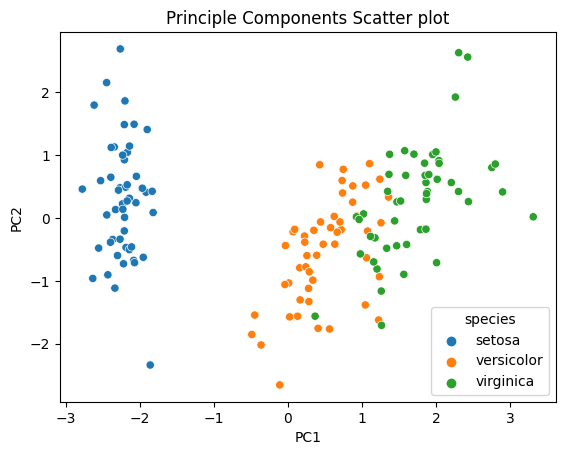

In [13]:
# Plot scatterplot of PCA
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='species')
plt.title('Principle Components Scatter plot')
plt.show()

### In above case 4 dimensions are reduced only to 2 components using PCA

<a id="4"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 4</p>

## Question 4 : What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.
---

## Answer :

### PCA is a technique used for dimensionality reduction, which can be applied for feature extraction in machine learning. Feature extraction is a process of transforming high-dimensional data into a lower-dimensional space while retaining the essential information. The main goal of feature extraction is to reduce the computational complexity of the data, improve the accuracy of machine learning models, and enhance the interpretability of the results.

### PCA can be used for feature extraction by identifying the principal components that capture the maximum amount of variance in the data. These principal components can be considered as the most important features of the original data, and they can be used as input for machine learning models. This approach not only reduces the dimensionality of the data but also enhances the interpretability of the features.

### Here's an example of how to use PCA for feature extraction in Python using Scikit-learn library

In [14]:
# Loading Credit Card Default Dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/utkarshg1/Credit-Card-Default-Prediction-Utkarsh/main/Dataset/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [16]:
# Seperating X and Y
X = df.drop(labels=['ID','default.payment.next.month'],axis=1)
Y = df[['default.payment.next.month']]

# Apply StandardScaler to X data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [17]:
# Performing PCA to transform X with 95% captured Variablity
from sklearn.decomposition import PCA
pca = PCA(0.90)
X_pca = pca.fit_transform(X_scaled)
# print the variance ratio explained by each principal component
print("Variance Ratio:", pca.explained_variance_ratio_)
print('\nTop 5 rows of transformed PCA data :\n',X_pca[0:5])

Variance Ratio: [0.28448215 0.17818817 0.06743307 0.06401154 0.04457556 0.04161737
 0.03946035 0.03859201 0.03788041 0.03404042 0.03186036 0.02968788
 0.02482385]

Top 5 rows of transformed PCA data :
 [[-1.88796243 -0.90610864 -0.48779485 -0.54001512  0.99795729  0.0444039
  -0.6236867   0.11279385 -0.18989407 -0.08460241  0.24536379  3.26440454
  -1.04859065]
 [-0.76469577 -2.10928757  1.0973135  -0.48347978  0.85898024 -0.23509848
   0.06474193  0.09359506 -0.15369954  0.12403462  0.14171121 -0.88185464
   0.07816213]
 [-0.8474079  -1.07217896  0.4121783  -0.4335639   0.77049273  0.01866504
  -0.15047242 -0.09188369 -0.15617916  0.08917074  0.04622218 -0.27301229
   0.51995332]
 [-0.1965886  -0.80902155 -0.81864236  0.29287825  0.90936607 -0.28464494
   0.23522086 -0.06298424  0.11461239 -0.06700726  0.02131769  0.03954459
  -0.71191663]
 [-0.84093409 -0.07253802 -1.00525746  2.3280133  -1.02312379  0.79433025
   0.71106909  0.12419084  0.60252764 -0.30747821  1.03584848 -0.60843713

In [18]:
X.shape

(30000, 23)

In [19]:
X_pca.shape

(30000, 13)

### Above shows that 23 columns are now reduced only to 13 components using PCA with 90% explained variance

<a id="5"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 5</p>

## Question 5 : You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.
---

## Answer :

### In order to use Min-Max scaling to preprocess the data for a recommendation system for a food delivery service, I would follow these steps:

1. Identify the numerical features that need to be scaled. In this case, we have three numerical features: price, rating, and delivery time.

2. Apply the Min-Max scaling method to each feature independently. The formula for Min-Max scaling is as follows:

~~~
scaled_feature = (feature - min(feature)) / (max(feature) - min(feature))

This formula scales each feature to a range of values between 0 and 1, where the minimum value in the original feature is mapped to 0, and the maximum value is mapped to 1.
~~~

3. Implement the Min-Max scaling method using a library such as Scikit-learn . Here is an example of how to implement Min-Max scaling using Scikit-learn:

In [20]:
# Generating example data for explaing above
import pandas as pd
dct = {
    'food_item':['pizza','burger','pasta','noodles'],
    'price':[500,100,150,120],
    'delivery_time':[30,15,10,8]
}

df = pd.DataFrame(dct)
df

,food_item,price,delivery_time
0,pizza,500,30
1,burger,100,15
2,pasta,150,10
3,noodles,120,8


In [21]:
# Extract the numerical features
X_num = df[['price','delivery_time']]

# Apply Min-Max scaling to the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_num),
                        columns=X_num.columns)
X_scaled

,price,delivery_time
0,1.000,1.000000
1,0.000,0.318182
2,0.125,0.090909
3,0.050,0.000000


### By applying Min-Max scaling to the numerical features, we ensure that the different features are on a similar scale, which can help improve the performance of machine learning models and recommendation algorithms that use the data.

<a id="6"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 6</p>

## Question 6 : You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.
---

## Answer :

### PCA (Principal Component Analysis) is a dimensionality reduction technique that is commonly used to reduce the number of features in a dataset while retaining the most important information. In the context of building a model to predict stock prices, we could use PCA to reduce the dimensionality of the dataset by identifying the most significant features that are driving the stock price movement.

### Here is a step-by-step approach to using PCA for this purpose:

1. Standardize the data: The first step is to standardize the data by subtracting the mean and dividing by the standard deviation. This ensures that all features have the same scale and helps to improve the performance of PCA.

2. Compute the covariance matrix: Next, we compute the covariance matrix of the standardized data. The covariance matrix represents the relationships between the different features in the dataset.

3. Compute the eigenvectors and eigenvalues: We then calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the magnitude of the variation.

4. Select the principal components: We then select the top k eigenvectors with the highest eigenvalues. These eigenvectors are known as the principal components and represent the most important features in the dataset.

5. Project the data onto the principal components: Finally, we project the original data onto the selected principal components to obtain a new, reduced-dimensional dataset. This dataset can then be used as input to a machine learning algorithm to predict stock prices.

### Can import PCA library from sklearn.decompose module

~~~python 
from sklearn.decompose import PCA
# Capture 95% explained variability with PCA module
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
# print the variance ratio explained by each principal component
print("Variance Ratio:", pca.explained_variance_ratio_)
print('\nTop 5 rows of transformed PCA data :\n',X_pca[0:5])
~~~

### By reducing the dimensionality of the dataset using PCA, we can simplify the problem of predicting stock prices and potentially improve the performance of our model. However, it is important to note that PCA may not always improve the performance of a model and should be evaluated carefully in each specific case.

<a id="7"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 7</p>

## Question 7 : For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.
---

## Answer :

In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define the dataset
data = np.array([1, 5, 10, 15, 20])

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the data using the scaler
data_scaled = scaler.fit_transform(data.reshape(-1,1))

print(data_scaled.flatten())

[-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


<a id="8"></a>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 8</p>

## Question 8 : For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?
---

## Answer :

### The number of principal components to retain in PCA depends on the level of variance we want to preserve in the dataset. In general, we want to retain enough principal components to explain a significant portion of the total variance in the data, while also keeping the number of features as small as possible.

### To determine how many principal components to retain for the given dataset containing the features height, weight, age, gender, and blood pressure, we would perform the following steps:

1. Standardize the data: We would first standardize the data by subtracting the mean and dividing by the standard deviation. This ensures that all features have the same scale and helps to improve the performance of PCA.

2. Compute the covariance matrix: Next, we would compute the covariance matrix of the standardized data. The covariance matrix represents the relationships between the different features in the dataset.

3. Compute the eigenvectors and eigenvalues: We would then calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the magnitude of the variation.

4. Select the principal components: We would then select the top k eigenvectors with the highest eigenvalues. These eigenvectors are known as the principal components and represent the most important features in the dataset.

5. Evaluate the explained variance: Finally, we would evaluate the amount of variance explained by each principal component and choose the number of principal components that preserve a significant portion of the total variance in the data.

### Typically, we would select the number of principal components that can explain at least 80% of the total variance in the data. However, the exact number of principal components to retain may depend on the specific dataset and the problem we are trying to solve.

### In summary, we would need to perform PCA on the given dataset to determine the optimal number of principal components to retain based on the amount of variance we want to preserve.

### Below is Example code of How I would Perform PCA on above components :

In [23]:
# Generating random data with given features
import numpy as np
import pandas as pd

# Set the seed for reproducibility
np.random.seed(678)

# Generate random data for each feature
height = np.random.normal(loc=170, scale=10, size=10000)
weight = np.random.normal(loc=70, scale=10, size=10000)
age = np.random.randint(18, 65, size=10000)
gender = np.random.choice(['Male', 'Female'], size=10000)
blood_pressure = np.random.normal(loc=120, scale=10, size=10000)

# Combine the data into a Pandas DataFrame
data = pd.DataFrame({'Height': height, 
                     'Weight': weight, 
                     'Age': age, 
                     'Gender': gender, 
                     'Blood Pressure': blood_pressure})

# Print the first 5 rows of the data
data.head()

,Height,Weight,Age,Gender,Blood Pressure
0,197.264488,78.301335,37,Male,123.426840
1,181.909333,71.500660,41,Female,103.227835
2,172.938287,86.183821,46,Male,143.637328
3,188.764607,84.627080,55,Female,113.360023
4,165.582489,65.257311,63,Female,116.065510


In [24]:
# Seperating categorical and numerical variables in data 
cat_cols = list(data.columns[data.dtypes == 'object'])
num_cols = list(data.columns[data.dtypes != 'object'])
# Print Categorical and Numeric Variables
print('Categorical Variables : ',cat_cols)
print('Numerical Variables   : ',num_cols)

Categorical Variables :  ['Gender']
Numerical Variables   :  ['Height', 'Weight', 'Age', 'Blood Pressure']


In [25]:
# Converting Categotrical variables to Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[cat_cols[0]]=le.fit_transform(data[cat_cols].values.flatten())
data.head()

,Height,Weight,Age,Gender,Blood Pressure
0,197.264488,78.301335,37,1,123.426840
1,181.909333,71.500660,41,0,103.227835
2,172.938287,86.183821,46,1,143.637328
3,188.764607,84.627080,55,0,113.360023
4,165.582489,65.257311,63,0,116.065510


In [26]:
# Applying StandardScaler to entire dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data_scaled.head()

,Height,Weight,Age,Gender,Blood Pressure
0,2.763392,0.839863,-0.294147,0.99561,0.348117
1,1.212299,0.157775,0.003407,-1.00441,-1.689637
2,0.306094,1.630453,0.375350,0.99561,2.387031
3,1.904781,1.474316,1.044847,-1.00441,-0.667462
4,-0.436947,-0.468415,1.639956,-1.00441,-0.394522


In [27]:
# Perform PCA with 3 components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_pca = pd.DataFrame(pca.fit_transform(data_scaled),columns=['PC1','PC2','PC3'])
# print the variance ratio explained by each principal component
print("Variance Ratio:", pca.explained_variance_ratio_)
print('\nTop 5 rows of transformed PCA data :\n',X_pca.head())

Variance Ratio: [0.20491989 0.20113817 0.20024048]

Top 5 rows of transformed PCA data :
         PC1       PC2       PC3
0  0.179922 -1.464986  0.664593
1 -0.536445 -1.423220  1.533594
2  2.149224  0.738165 -0.709998
3  1.316837 -1.776677  1.784522
4  0.597166 -0.539852  0.356913


### Selected 3 Principal Components as it covers 80% of explained Variance